# Chessboard Vision Project  

## 📌 Introduction  
This project is part of the **Computer Vision** course in the Master's in Artificial Intelligence. The goal is to detect chess pieces on a board from images, determine their positions using bounding boxes, and represent them in an 8x8 matrix format. The solution is implemented in Python and follows a structured image processing pipeline.

## 🎯 Task Overview  
- **Input:** Chessboard image  
- **Output:**  
  - Total number of black/white pieces  
  - Bounding boxes around detected pieces  
  - 8x8 matrix representing piece positions  
- **Dataset:** 50 images for development, 10 unseen test images  
- **Deliverables:**  
  - Python script (single file)  
  - Short report (max 2 pages) 

---

In [21]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import math

# Data Directory
dataDir = 'images'

# Define the window size
window_width = 800
window_height = 600

---

## First Image Test

In [22]:
# Function to resize image
def resize_image(image, window_width, window_height):
    height, width = image.shape[:2]
    scaling_factor = min(window_width / width, window_height / height)
    return cv2.resize(image, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)

Image Dimensions: 3072 x 3072
Number of Channels: 3


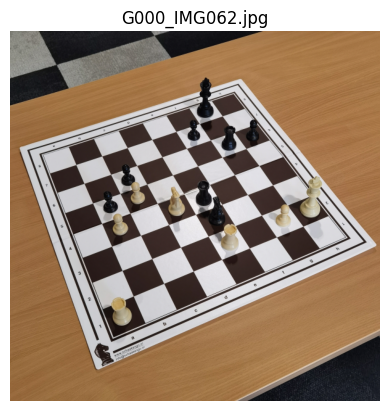

In [23]:
# Read and Display an Image
# Opening an image
img = cv2.imread(os.path.join(dataDir, 'G000_IMG062.jpg'))

# Get the dimensions of the image
height, width, channels = img.shape
print(f'Image Dimensions: {height} x {width}')
print(f'Number of Channels: {channels}')

# Calculate the scaling factor
scaling_factor = min(window_width / width, window_height / height)

# Resize the image
resized_img = resize_image(img, window_width, window_height)

# Display the resized image using matplotlib
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.title('G000_IMG062.jpg')
plt.axis('off')
plt.show()

---

## Image Processing

### 1. Convert to Graysacale

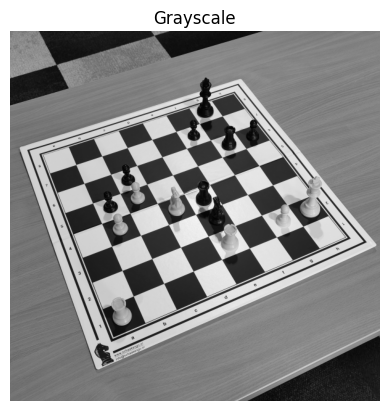

In [24]:
# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize image for display
resized_gray = resize_image(gray, window_width, window_height)

# Display Grayscale Image
plt.imshow(resized_gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')
plt.show()

### 2. Apply Gaussian Blur

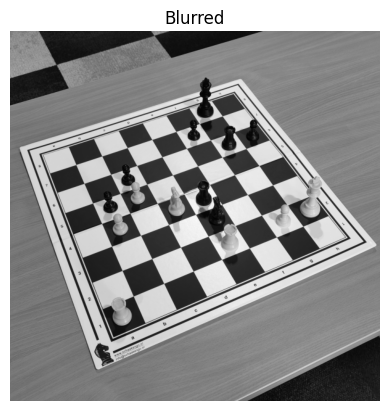

In [25]:
# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Resize image for display
resized_blurred = resize_image(blurred, window_width, window_height)

# Display Blurred Image
plt.imshow(resized_blurred, cmap='gray')
plt.title("Blurred")
plt.axis('off')
plt.show()

### 3. Apply Adaptive Thresholding

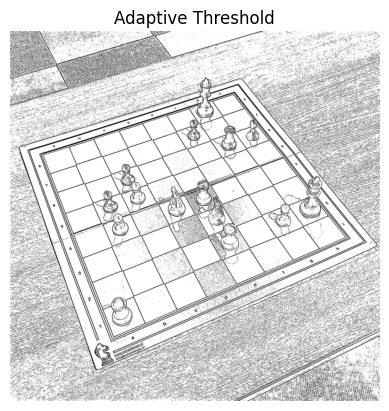

In [26]:
# Apply Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Resize image for display
resized_adaptive_thresh = resize_image(adaptive_thresh, window_width, window_height)

# Display Adaptive Threshold Image
plt.imshow(resized_adaptive_thresh, cmap='gray')
plt.title("Adaptive Threshold")
plt.axis('off')
plt.show()

### 4. Apply Canny Edge Detection

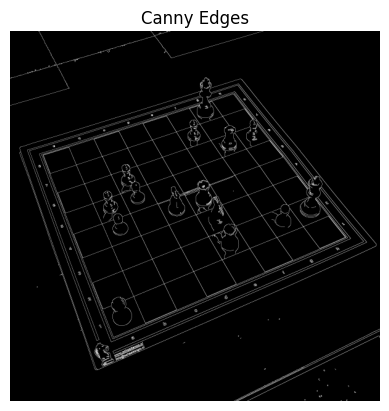

In [27]:
# Apply Canny Edge Detection
edges = cv2.Canny(blurred, 50, 150)

# Resize image for display
resized_edges = resize_image(edges, window_width, window_height)

# Display Canny Edges Image
plt.imshow(resized_edges, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')
plt.show()